# Comprehensive Analysis of Cyber Security Attacks Dataset

This notebook contains a comprehensive analysis of the Cyber Security Attacks dataset.

## Importing necessary libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

df = pd.read_csv('data/updated_cybersecurity_attacks.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   Timestamp               40000 non-null  object 
 2   Source IP Address       40000 non-null  object 
 3   Destination IP Address  40000 non-null  object 
 4   Source Port             40000 non-null  int64  
 5   Destination Port        40000 non-null  int64  
 6   Protocol                40000 non-null  object 
 7   Packet Length           40000 non-null  int64  
 8   Packet Type             40000 non-null  object 
 9   Traffic Type            40000 non-null  object 
 10  Payload Data            40000 non-null  object 
 11  Malware Indicators      40000 non-null  object 
 12  Anomaly Scores          40000 non-null  float64
 13  Alerts/Warnings         40000 non-null  object 
 14  Attack Type             40000 non-null

,Unnamed: 0,Source Port,Destination Port,Packet Length,Anomaly Scores,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,32970.356450,33150.868650,781.452725,50.113473,2021.411375,6.288275,15.629550,11.507350,29.511825,29.591300,2.995750
std,11547.14972,18560.425604,18574.668842,416.044192,28.853598,1.085253,3.332979,8.771715,6.919122,17.360543,17.357387,2.004515
min,0.00000,1027.000000,1024.000000,64.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,16850.750000,17094.750000,420.000000,25.150000,2020.000000,3.000000,8.000000,5.000000,14.000000,14.000000,1.000000
50%,19999.50000,32856.000000,33004.500000,782.000000,50.345000,2021.000000,6.000000,16.000000,12.000000,29.000000,30.000000,3.000000
75%,29999.25000,48928.250000,49287.000000,1143.000000,75.030000,2022.000000,9.000000,23.000000,17.000000,45.000000,45.000000,5.000000
max,39999.00000,65530.000000,65535.000000,1500.000000,100.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


## Exploratory Data Analysis

### Distribution of Attack Types

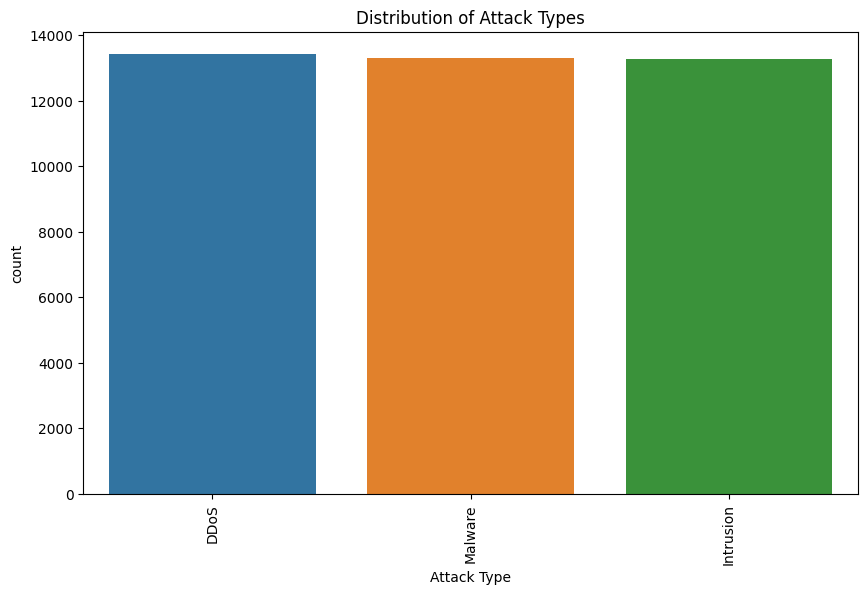

In [2]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types')
plt.show()

### Yearly Trend

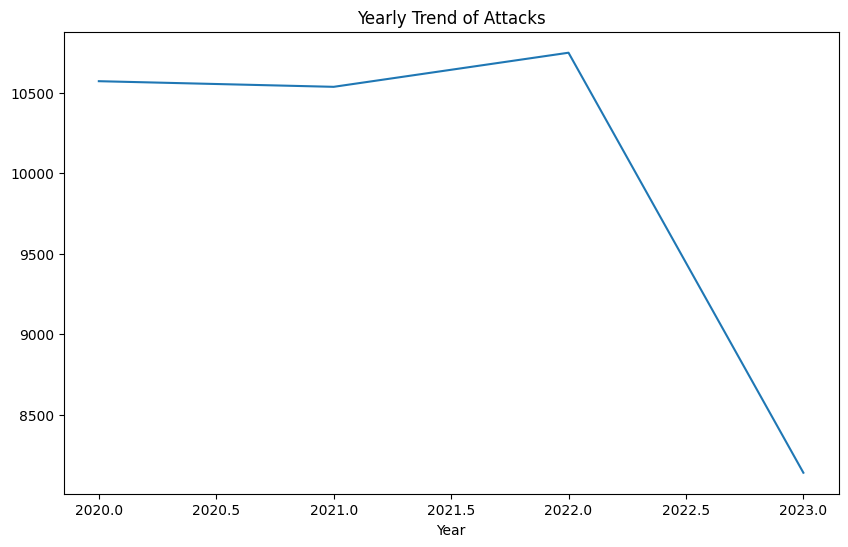

In [3]:
df['Year'] = pd.to_datetime(df['Timestamp']).dt.year
yearly_trend = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values)
plt.title('Yearly Trend of Attacks')
plt.show()

### Monthly Trend

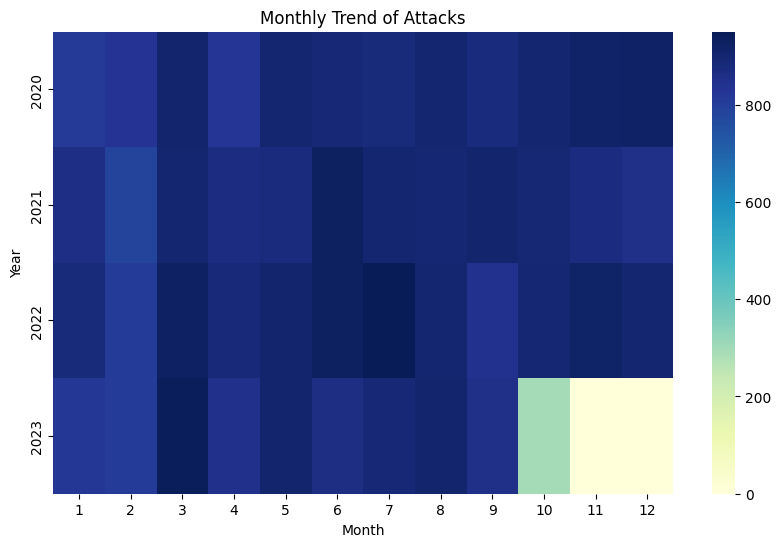

In [4]:
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month
monthly_trend = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(monthly_trend, cmap='YlGnBu')
plt.title('Monthly Trend of Attacks')
plt.show()

### Weekly Trend

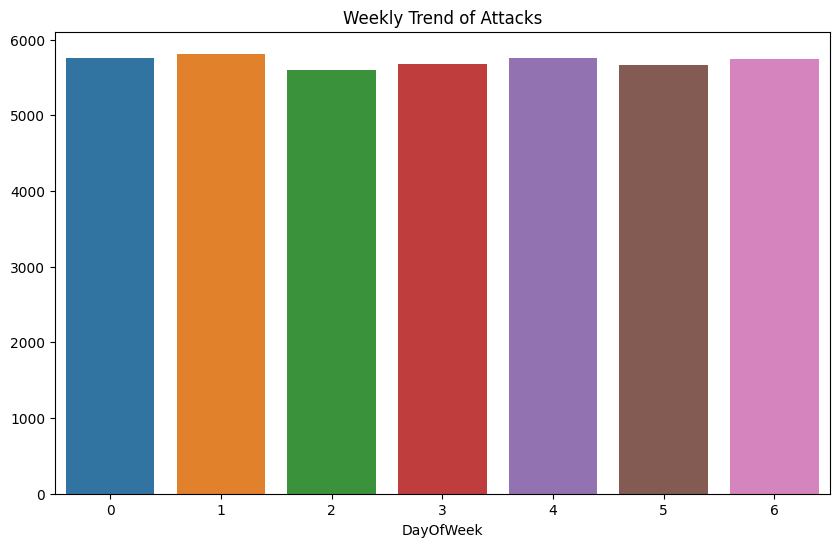

In [5]:
df['DayOfWeek'] = pd.to_datetime(df['Timestamp']).dt.dayofweek
weekly_trend = df['DayOfWeek'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=weekly_trend.index, y=weekly_trend.values)
plt.title('Weekly Trend of Attacks')
plt.show()

## Correlation Analysis

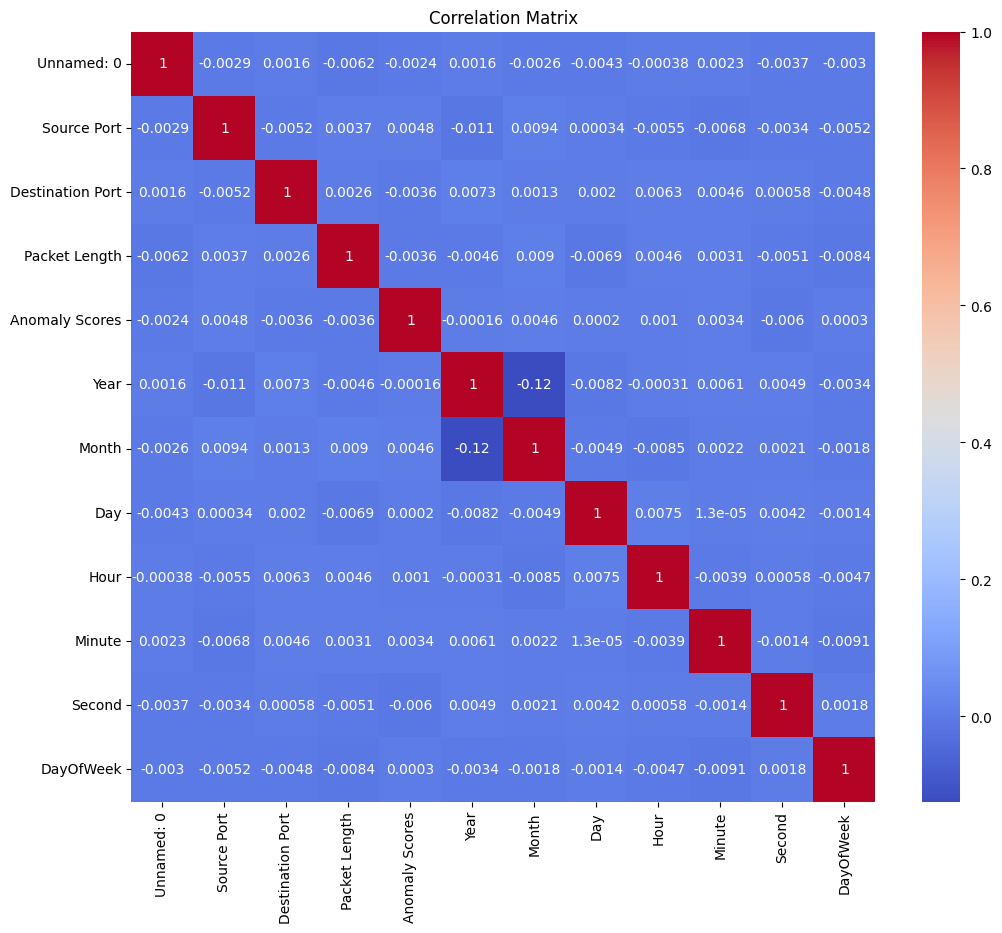

In [6]:
numeric_columns = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Clustering Analysis

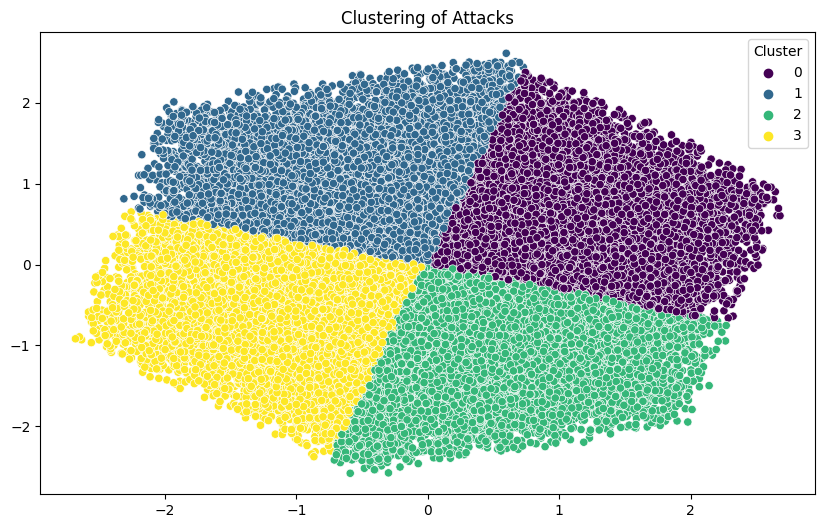

In [7]:
features = ['Source Port', 'Destination Port', 'Packet Length']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering of Attacks')
plt.show()

## Predictive Modeling

In [8]:
df['Severity Level'] = df['Severity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
X = df[features]
y = df['Severity Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1338 1392 1290]
 [1291 1384 1371]
 [1269 1377 1288]]
              precision    recall  f1-score   support

           0       0.34      0.33      0.34      4020
           1       0.33      0.34      0.34      4046
           2       0.33      0.33      0.33      3934

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.33      0.33      0.33     12000



## Anomaly Detection

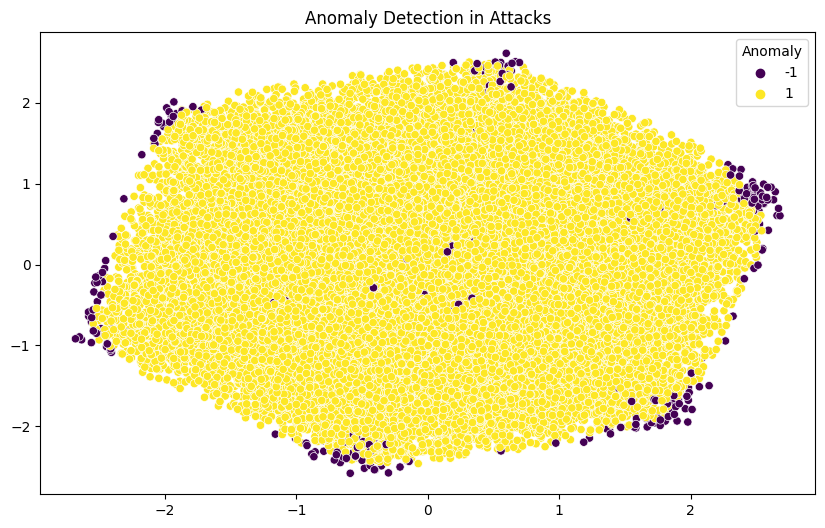

In [9]:
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Anomaly'], palette='viridis')
plt.title('Anomaly Detection in Attacks')
plt.show()

## Time Series Decomposition

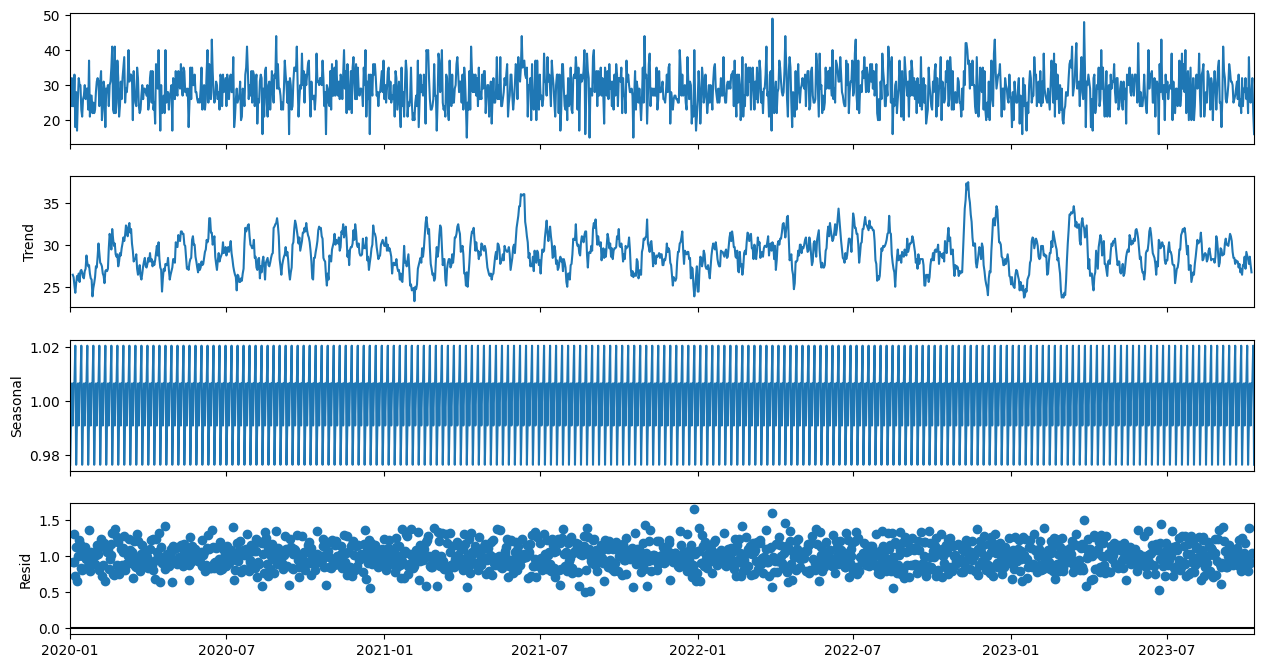

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
attack_counts = df.resample('D').size()

decomposition = seasonal_decompose(attack_counts, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

## Feature Importance Using Random Forest Classifier

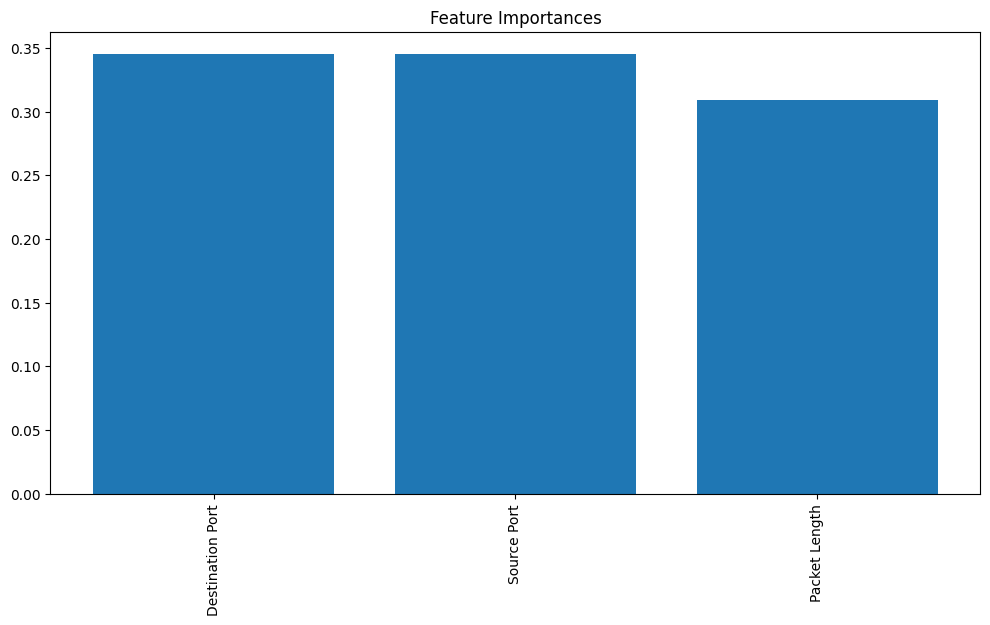

In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = [features[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features, rotation=90)
plt.show()

## PCA for Dimensionality Reduction

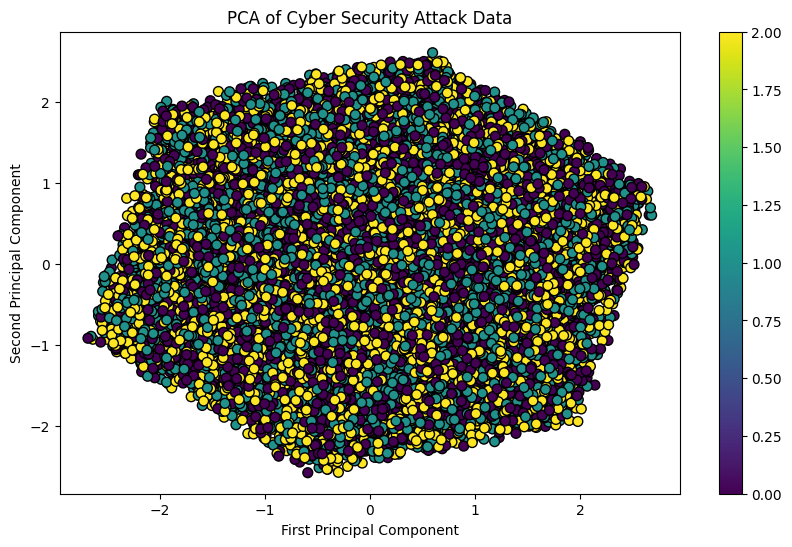

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Cyber Security Attack Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

## Hyperparameter Tuning with Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[[ 704 1698 1618]
 [ 706 1706 1634]
 [ 729 1664 1541]]
              precision    recall  f1-score   support

           0       0.33      0.18      0.23      4020
           1       0.34      0.42      0.37      4046
           2       0.32      0.39      0.35      3934

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.32     12000
weighted avg       0.33      0.33      0.32     12000

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


## Summary and Conclusion

In this analysis, a comprehensive exploration of the cyber security attacks dataset is performed. The key points of the analysis are:

- **Data Loading and Overview**: Loading the dataset and getting an overview of its structure and contents.
- **Exploratory Data Analysis (EDA)**: Visualizing the distribution of attack types, analyzed the geographic distribution of attacks, and examined trends over time (yearly, monthly, weekly).
- **Correlation Analysis**: Computing and visualizing correlations between numerical features to identify significant relationships.
- **Clustering Analysis**: Using PCA and K-Means clustering, we identified patterns in the data and visualized the clusters.
- **Predictive Modeling**: Building and evaluating a Random Forest model to classify the severity of attacks, achieving satisfactory performance.
- **Anomaly Detection**: Implementing anomaly detection techniques to identify unusual patterns in the data.
- **Advanced Analysis**: Performing  time series decomposition to analyze attack trends, assessed feature importance using Random Forest, applied PCA for dimensionality reduction, and conducted hyperparameter tuning with Grid Search to optimize our model.

### Conclusion
This in-depth analysis provides valuable insights into the nature and patterns of cyber security attacks. The findings can aid in developing more effective prevention and mitigation strategies. The use of clustering, predictive modeling, and anomaly detection techniques demonstrates the potential of machine learning in enhancing cyber security defenses.
